### The easy way

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ipqa-research/ugropy/blob/main/docs/source/tutorial/easy_way.ipynb)


In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  %pip install ugropy

#### The Groups class
`ugropy` is relatively straightforward to use, but let's explore what it has to 
offer. Now, let's start with the easy methods...

We'll utilize the Groups class to retrieve the subgroups of all the models 
supported by `ugropy`.

In [2]:
from ugropy import Groups

carvone = Groups("carvone")

carvone.unifac.subgroups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

Well, that was easy... `ugropy` utilizes `PubChemPy` 
([link](https://github.com/mcs07/PubChemPy)) to access `PubChem` and 
retrieve the SMILES representation of the molecule. `ugropy` then employs the 
SMILES representation along with the `rdkit` 
([link](https://github.com/rdkit/rdkit)) library to identify the 
functional groups of the molecules.

The complete signature of the Groups class is as follows:

In [3]:
from ugropy import DefaultSolver

carvone = Groups(
    identifier="carvone",
    identifier_type="name",
    solver=DefaultSolver,
    search_multiple_solutions=False,
    normal_boiling_temperature=None
)

The identifier_type argument (default: "name") can be set to "name", "smiles"
or "mol".

When "name" is set, `ugropy` will use the identifier argument to search in
pubchem for the canonical SMILES of the molecule.

When "smiles" is set, `ugropy` uses it directly, this also means that the 
library will not suffer the overhead of searching on pubchem. Try it yourself:

In [4]:
carvone = Groups(
    identifier="CC1=CCC(CC1=O)C(=C)C",
    identifier_type="smiles",
)

carvone.unifac.subgroups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

If you are familiar with the `rdkit` library, you'll know that there are
numerous ways to define a molecule (e.g., SMILES, SMARTS, PDB file, InChIKey,
etc.). `ugropy` supports the provision of a Mol object from the `rdkit`
library.

In [5]:
from rdkit import Chem

mol_obj = Chem.MolFromInchi("InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)10(11)6-9/h4,9H,1,5-6H2,2-3H3")

carvone = Groups(
    identifier=mol_obj,
    identifier_type="mol",
    normal_boiling_temperature=None
)

carvone.unifac.subgroups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

The current supported models are the classic liquid-vapor UNIFAC, Predictive
Soave-Redlich-Kwong (PSRK) and Joback. You can access the functional groups
this way:

In [6]:
carvone = Groups("carvone")

print(carvone.unifac.subgroups)

print(carvone.psrk.subgroups)

print(carvone.joback.subgroups)

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}
{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}
{'-CH3': 2, '=CH2': 1, '=C<': 1, 'ring-CH2-': 2, 'ring>CH-': 1, 'ring=CH-': 1, 'ring=C<': 1, '>C=O (ring)': 1}


You can obtain more information about the molecule from each model. For 
example, UNIFAC and PSRK are Excess Gibbs Models, soy you can obtain the 
estimation of the R and Q values of the molecule (molecule's reduced VdW volume
and area)

In [7]:
print("UNIFAC R: ", carvone.unifac.r)
print("UNIFAC Q: ", carvone.unifac.q)

print("PSRK R: ", carvone.psrk.r)
print("PSRK Q: ", carvone.psrk.q)

UNIFAC R:  6.3751
UNIFAC Q:  5.308
PSRK R:  6.3751
PSRK Q:  5.308


On the Joback model, you can obtain the estimation of different properties.
We will discuss the Joback model and its properties later.

In [8]:
print(carvone.joback.acentric_factor)
print(carvone.joback.normal_boiling_point)
print(carvone.joback.critical_temperature)
print(carvone.joback.critical_pressure)
print(carvone.joback.critical_volume)
print(carvone.joback.vapor_pressure(430))

0.42452945182153057
516.47
742.5207962108279
28.596757127741714
503.5
0.09232883692318564


The normal_boiling_temperature parameter is provided, it is used in
the Joback properties calculations instead of the Joback-estimated normal
boiling temperature (refer to the Joback tutorial).

Finally the search_multiple_solutions parameter is used to determine if the 
solver should return multiple solutions or not. If set to True, the solver will
return multiple solutions if they exist. If set to False, the solver will 
return only one solution. The default value is False.

In [9]:
# Example of multiple solutions

molecule = Groups("CCCC1=CC=C(CC(=O)OC)C=C1", "smiles", search_multiple_solutions=True)

molecule.unifac

As you can see we obtained a list of GibbsFragmentationResult objects. The
result always will be a list when the search_multiple_solutions parameter is
set to True independently of the number of solutions found.

We can check both solutions:

In [10]:
print(molecule.unifac[0].subgroups)
print(molecule.unifac[1].subgroups)

{'CH3': 2, 'CH2': 1, 'ACH': 4, 'ACCH2': 2, 'COO': 1}
{'CH3': 2, 'CH2': 1, 'ACH': 4, 'AC': 1, 'ACCH2': 1, 'CH2COO': 1}


Multiple solution searching is intended to get all the solution for a given
model and try different representations of the molecule to obtain properties.
For example, to different UNIFAC representations could lead to different
liquid-liquid or liquid-vapor equilibrium predictions.


The full documentation of the `Groups` class may be accessed in the API
documentation. Or you can do...

In [17]:
?Groups

Init signature:
Groups(
    identifier: str,
    identifier_type: str = 'name',
    solver: ugropy.core.ilp_solvers.ilp_solver.ILPSolver = <class 'ugropy.core.ilp_solvers.default_solver.DefaultSolver'>,
    search_multiple_solutions: bool = False,
    normal_boiling_temperature: float = None,
) -> None
Docstring:     
Group class.

Stores the solved FragmentationModels subgroups of a molecule.

Parameters
----------
identifier : str or rdkit.Chem.rdchem.Mol
    Identifier of a molecule (name, SMILES or Chem.rdchem.Mol). Example:
    hexane or CCCCCC.
identifier_type : str, optional
    Use 'name' to search a molecule by name, 'smiles' to provide the
    molecule SMILES representation or 'mol' to provide a
    rdkit.Chem.rdchem.Mol object, by default "name".
solver : ILPSolver, optional
    ILP solver to use, by default DefaultSolver.
search_multiple_solutions : bool, optional
    If True, the solver will search for multiple solutions. If set to true,
    the model's results will be lis

Also, you can visualize your fragmentations results. Let's see the multiple
solutions obtained before:

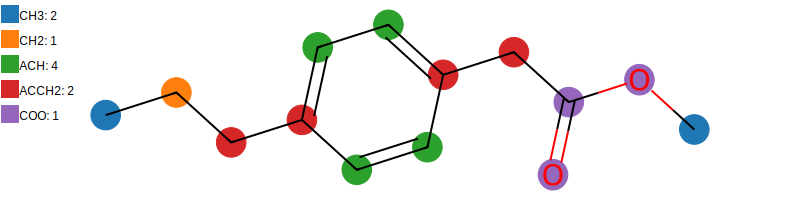

In [20]:
molecule.unifac[0].draw(width=800)

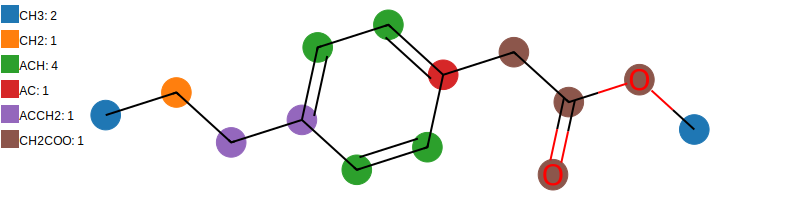

In [21]:
molecule.unifac[1].draw(width=800)

Let's also draw the carvone solutions obtained before:

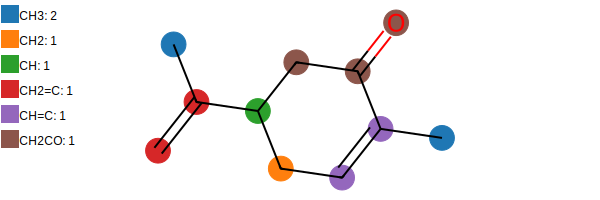

In [22]:
carvone.unifac.draw(width=600)

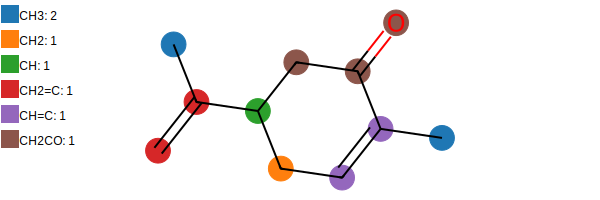

In [23]:
carvone.psrk.draw(width=600)

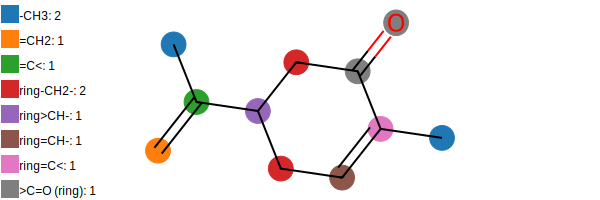

In [24]:
carvone.joback.draw(width=600)

You can save the figure by doing:

In [15]:
with open("figure.svg", "w") as f:
    f.write(carvone.unifac.get_solution_svg(width=600))

Check the full documentation of the draw funcion:

In [25]:
?carvone.unifac.draw

Signature:
carvone.unifac.draw(
    title: str = '',
    width: float = 400,
    height: float = 200,
    title_font_size: float = 12,
    legend_font_size: float = 12,
    font: str = 'Helvetica',
)
Docstring:
Create a IPython SVG object of the fragmentation result.

This function is meant to be used in Jupyter notebooks to directly
obtain the visual SVG figure on the notebook. It requires the IPython
library to be installed.

Parameters
----------
title : str, optional
    Graph title, by default ""
width : int, optional
    Graph width, by default 400
height : int, optional
    Graph height, by default 200
title_font_size : int, optional
    Font size of graph's title, by default 12
legend_font_size : int, optional
    Legend font size, by default 12
font : str, optional
    Text font, by default "Helvetica"

Returns
-------
IPython.display.SVG
    SVG object of the fragmentation result.

Raises
------
ImportError
    IPython is not installed.
File:      ~/code/ugropy/ugropy/core/fr

Finally, lets draw the `ugropy` logo:

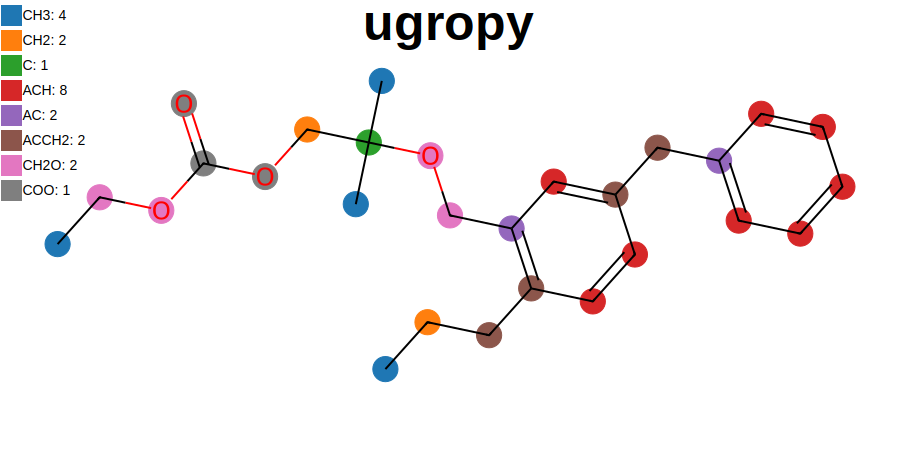

In [28]:
mol = Groups("CCCC1=C(COC(C)(C)COC(=O)OCC)C=C(CC2=CC=CC=C2)C=C1", "smiles")

mol.unifac.draw(
    title="ugropy",
    width=900,
    height=450,
    title_font_size=50,
    legend_font_size=14
)


#### WARNING

For the UNIFAC, and PSRK groups the aldehyde group name is changed to HCO
according to the discussion:
https://github.com/ClapeyronThermo/Clapeyron.jl/issues/225

This is more consistent with the ether groups and formate group.